# 1. Libraries and Data
In this first section I import the data into the work space, and give it the necessary format to be used during the stochastic modeling process.

In [392]:
# Libraries
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import matplotlib as mlp
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%load_ext autoreload
%autoreload 2
import stochastic_modeling as stc


mlp.style.use('seaborn-notebook')
sns.set(font_scale=1.1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
full_rates = pd.read_csv('historico_tasas_python.csv',index_col=0).astype(
    {'Fecha':'datetime64[ns]'}
).set_index('Fecha', drop=True)
full_rates

,TIBR,IBR Overnight,IBR 1M,IBR 3M,IBR 6M,DTF,IPC Anual,IPC Mensual,FED,UVR,...,IBC,USURA,TRM,DEV. TRM,LIBOR,SOFR,LEMPIRA/USD,DEV. LEMPIRA,COLON/USD,DEV. COLON
Fecha,,,,,,,,,,,,,,,,,,,,,
1999-01-01,0.26,NaN,NaN,NaN,NaN,0.3433,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.192126,NaN,NaN,NaN,NaN,271.65,0.110907
1999-01-02,0.26,NaN,NaN,NaN,NaN,0.3433,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.192126,NaN,NaN,NaN,NaN,271.65,0.110907
1999-01-03,0.26,NaN,NaN,NaN,NaN,0.3433,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.182300,NaN,NaN,NaN,NaN,271.65,0.110680
1999-01-04,0.26,NaN,NaN,NaN,NaN,0.3406,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.182300,NaN,NaN,NaN,NaN,271.65,0.110680
1999-01-05,0.26,NaN,NaN,NaN,NaN,0.3406,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1545.11,0.184601,NaN,NaN,NaN,NaN,271.85,0.111497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,0.02,0.01980,0.02039,0.02430,0.03000,0.0204,0.0444,0.0045,0.0025,286.3298,...,0.1708,0.25620,3786.05,-0.024666,0.001551,0.0005,24.2507,-0.014644,629.65,0.040916
2021-10-06,0.02,0.01976,0.02060,0.02456,0.03043,0.0204,0.0451,0.0038,0.0025,286.3726,...,0.1708,0.25620,3796.30,-0.012345,0.001561,0.0005,24.2507,-0.014536,629.12,0.041710
2021-10-07,0.02,0.01975,0.02048,0.02460,0.03038,0.0204,0.0451,0.0038,0.0025,286.4155,...,0.1708,0.25620,3788.03,-0.010123,0.001559,0.0005,24.2507,-0.014239,630.13,0.040351


In [254]:
monthly_rates = full_rates.groupby(pd.Grouper(freq='M')).last()

In [255]:
trm = monthly_rates['TRM']
trm = trm[:'2021-09']
trm

Fecha
1999-01-31    1582.90
1999-02-28    1568.30
1999-03-31    1533.51
1999-04-30    1604.44
1999-05-31    1671.67
               ...   
2021-05-31    3715.28
2021-06-30    3756.67
2021-07-31    3867.88
2021-08-31    3806.87
2021-09-30    3834.68
Freq: M, Name: TRM, Length: 273, dtype: float64

In [393]:
trm_gbm = stc.GBMRateSeries(trm,Np=10000)

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

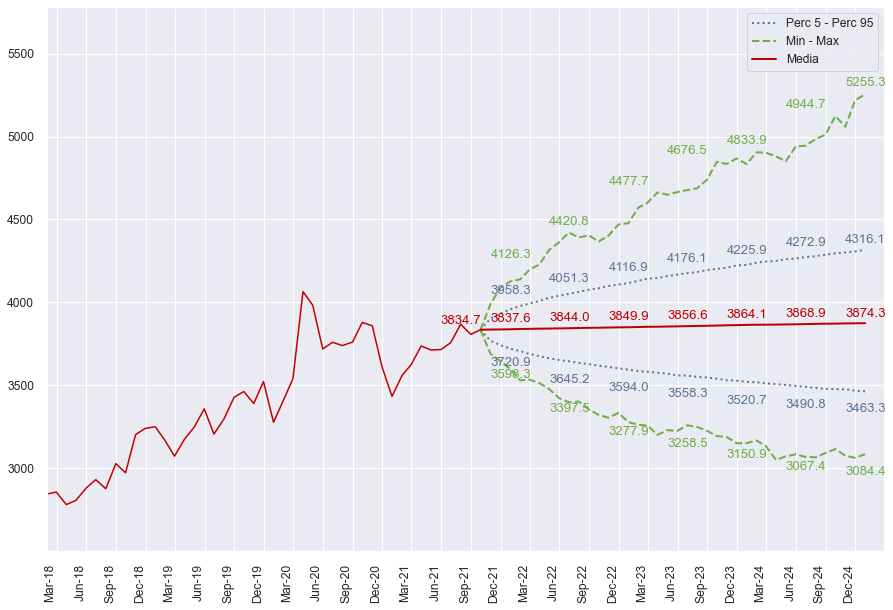

In [394]:
trm_gbm.plot_full_series('2018-01-01','2024-12-31')

(<Figure size 1800x720 with 1 Axes>, <AxesSubplot:>)

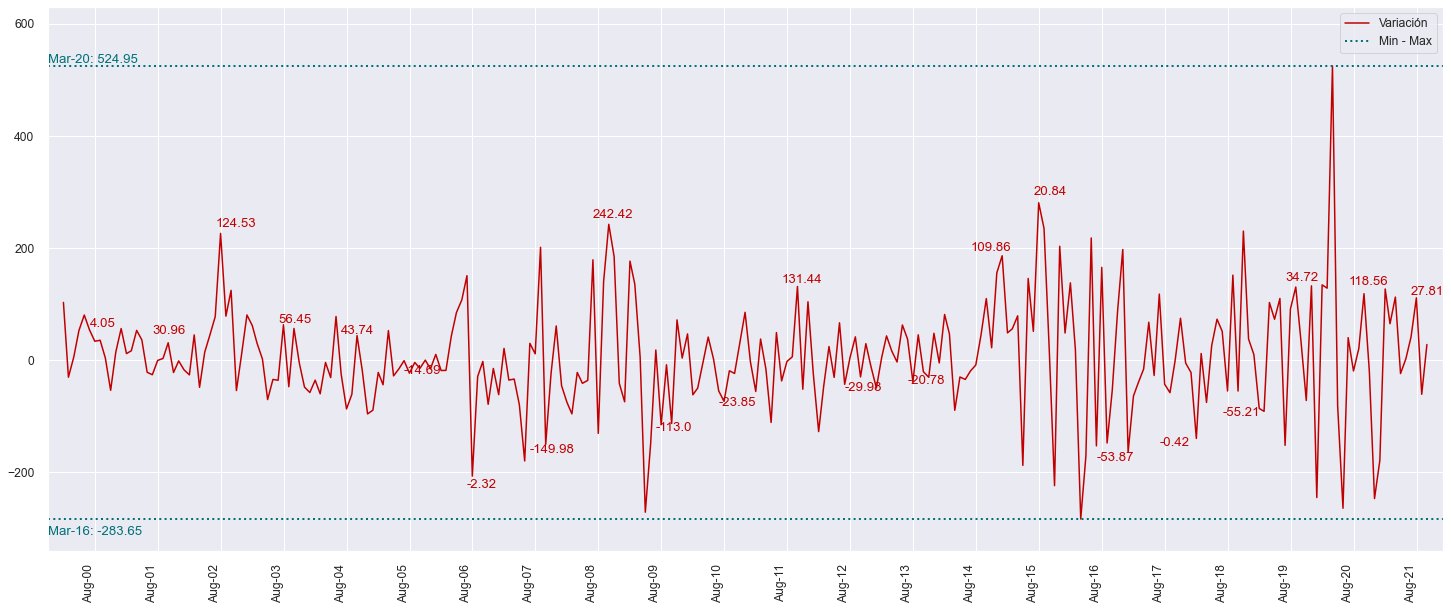

In [395]:
trm_gbm.plot_historic_variation(month_space=3, figsize=(25,10))

(<Figure size 1800x720 with 1 Axes>, <AxesSubplot:>)

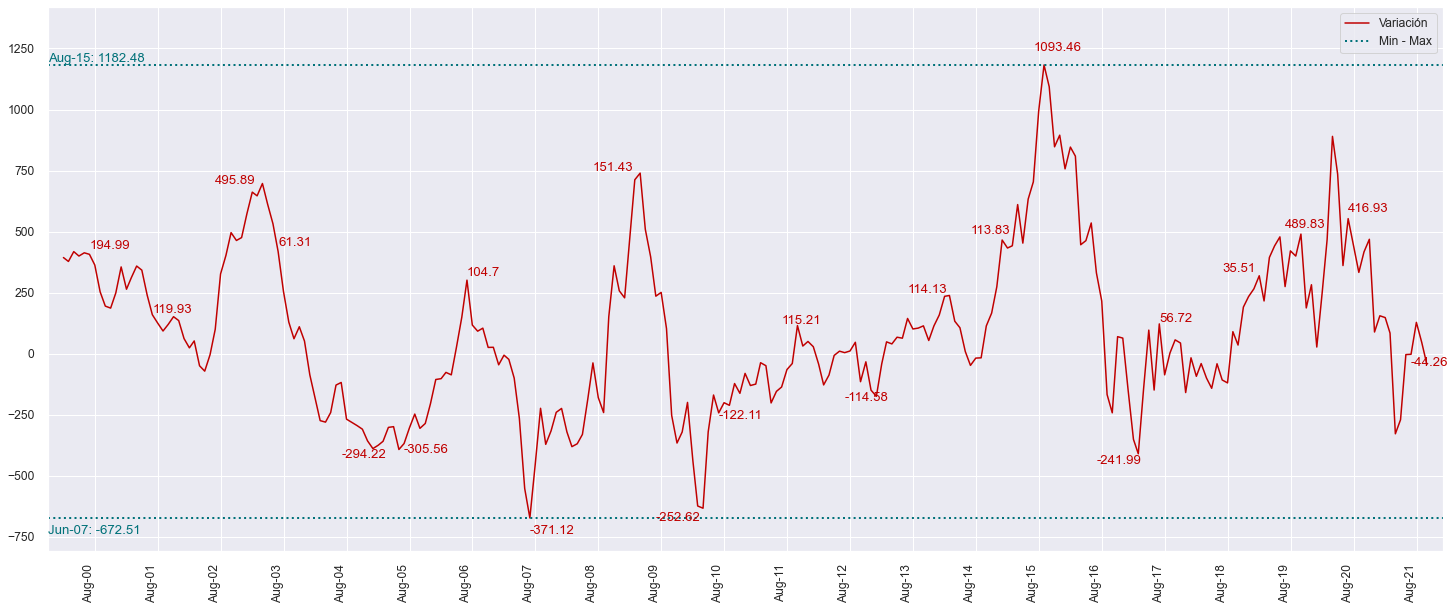

In [396]:
trm_gbm.plot_historic_variation(month_space=3, figsize=(25,10), ref=12)

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

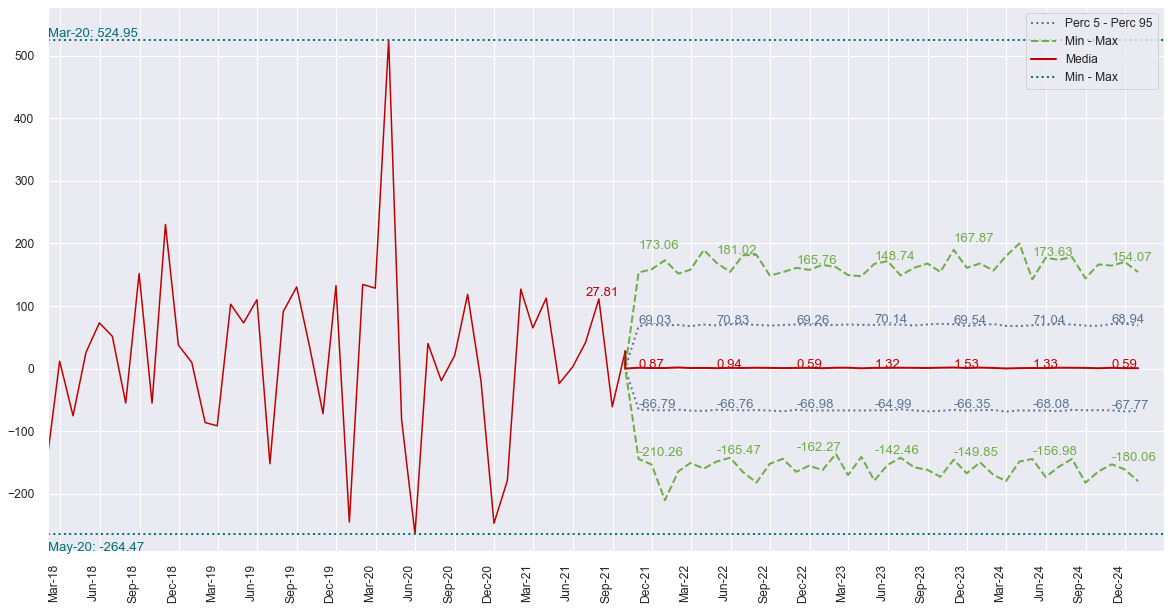

In [397]:
trm_gbm.plot_full_variations('2018-01-01', '2024-12-31', figsize=(20,10), dec=2)

In [398]:
np.log(trm/trm.shift(1)).agg(['min','mean','max', np.std])

min    -0.112046
mean    0.003253
max     0.138280
std     0.037212
Name: TRM, dtype: float64

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

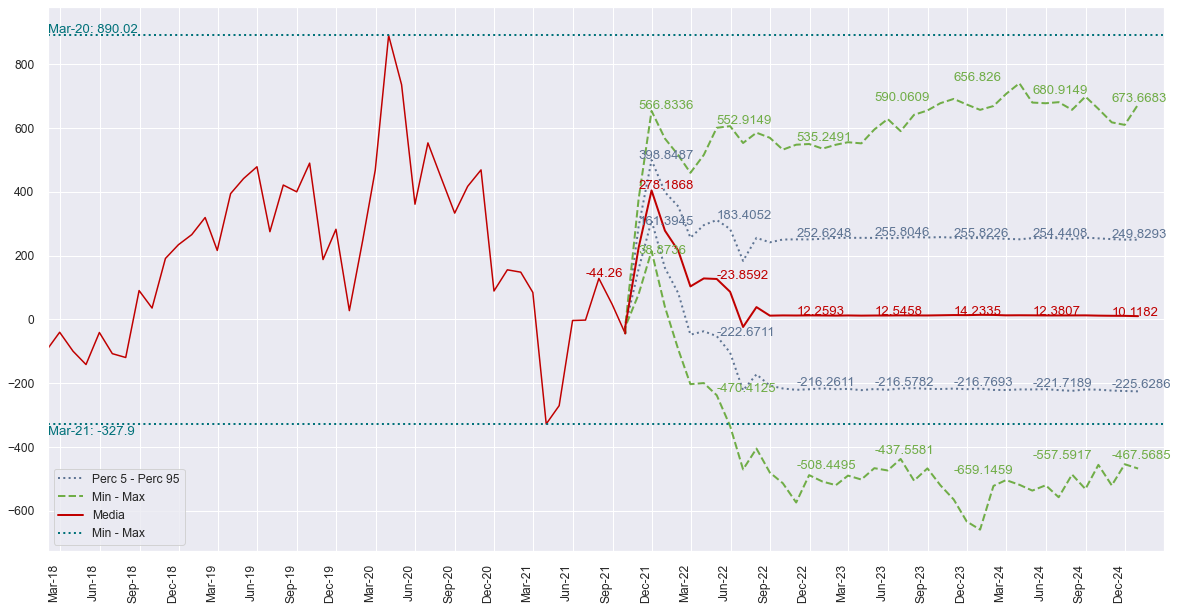

In [399]:
trm_gbm.plot_full_variations('2018-01-01', '2024-12-31', figsize=(20,10), ref=12, dec=4)

In [406]:
np.log(trm/trm.shift(1)).agg(['min','max','mean', 'std'])

min    -0.112046
max     0.138280
mean    0.003253
std     0.037212
Name: TRM, dtype: float64

<AxesSubplot:>

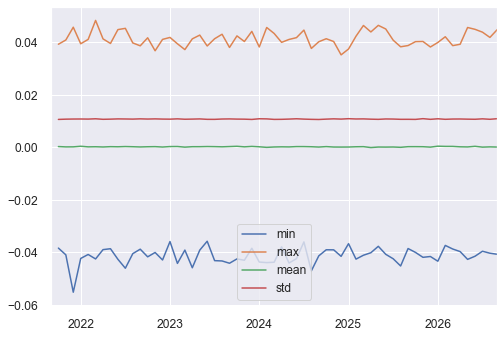

In [405]:
np.log(trm_gbm.sim_df/trm_gbm.sim_df.shift(1)).agg(['min','max','mean', 'std'], axis=1).plot()

In [223]:
(trm_gbm.sim_df-trm_gbm.sim_df.shift(1)).dropna()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-10-31,-9.891321,79.058487,155.357679,-10.212603,23.295246,-23.361903,12.044970,-112.456832,-2.629493,-26.015298,...,-55.564969,-3.518702,-33.521000,8.338196,-4.038442,-10.759136,-24.166308,-28.701073,-95.498777,-29.611870
2021-11-30,84.146635,80.164566,22.495551,46.474605,-11.587527,7.875459,6.298475,-2.427054,87.124304,43.249554,...,8.294848,-26.450616,-0.653759,-5.842035,4.947353,-48.697109,-3.521797,-1.261986,85.210985,-7.580472
2021-12-31,-60.427456,-41.865670,-21.074889,-18.031208,-4.850771,6.179738,49.741658,-49.504906,44.766587,19.750742,...,-19.465760,78.556060,-24.029266,-11.511632,12.924907,-15.787481,-11.527655,-36.821880,105.919317,34.655648
2022-01-31,-60.504375,23.705567,6.367896,-114.650142,20.844389,-49.949726,-25.186579,-53.214004,19.301185,-38.493918,...,1.561293,77.457760,-19.430009,-2.037172,-41.809907,-44.820503,11.564192,-71.151980,-86.106537,-20.258924
2022-02-28,56.780374,-3.383808,-46.676637,-10.089919,44.823343,-21.924263,9.558001,-9.140505,12.438612,-95.240998,...,12.040374,10.614294,-86.043240,-4.352142,-57.890468,9.660791,-70.773884,-5.358529,-6.006450,-22.866502
2022-03-31,-14.635204,43.368197,10.244048,11.795670,-19.951818,14.787368,-17.065310,-38.525533,-14.977070,-25.265851,...,0.478944,20.029447,-55.050160,47.302365,19.134070,-46.544280,-35.217356,-46.917022,-27.465517,32.052656
2022-04-30,3.305940,-40.297450,78.961964,16.059656,39.257503,-40.612247,-32.847512,-75.898244,10.436976,-12.167151,...,30.165607,-82.323461,44.063126,-75.213828,10.678382,27.441327,-47.481205,34.489425,23.465921,26.706837
2022-05-31,-0.347519,-14.887671,7.938315,-3.797451,8.288779,-21.307902,-22.278918,36.640137,61.682640,64.676022,...,20.335995,19.238200,50.545585,11.912006,13.374963,23.398150,52.337554,-51.401458,68.540531,-80.576526
2022-06-30,-48.099982,18.179156,75.043680,69.781595,23.431940,-42.508129,-79.482348,-43.851599,5.620383,-33.135830,...,-18.767772,46.967891,103.848137,-1.787820,21.184788,-41.267951,-70.225302,-59.464758,-33.422899,-48.219322
2022-07-31,-31.867993,31.566941,-56.715070,-28.862790,-1.535584,-9.774023,-57.541846,-16.042197,37.835775,61.301072,...,21.622446,9.675775,18.169708,-8.359484,-71.906977,62.957362,-6.079101,-23.683711,138.290792,-2.860501


In [225]:
(trm_gbm.series-trm_gbm.series.shift(1)).last('1D').item()

27.809999999999945

In [272]:
temp[(temp['Fecha']<='2021-09-30')
    & 
    (temp['Fecha']>='2020-09-30')].max()['max']

3834.68

In [265]:
trm.loc['2021-09-30']


3834.68

In [261]:
trm.reset_index().dtypes

Fecha    datetime64[ns]
TRM             float64
dtype: object

In [262]:
x['Fecha'] = x.index
x.dtypes

TRM             float64
Fecha    datetime64[ns]
dtype: object

In [270]:
for d in temp.loc[temp['Fecha']>'2026-01', 'Fecha']:
    print(d, type(d))

2026-01-31 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-02-28 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-03-31 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-04-30 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-05-31 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-06-30 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-07-31 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-08-31 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2026-09-30 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
